In [15]:
%matplotlib notebook
import numpy as np
from ipywidgets import *
import ipywidgets as widgets
from random import random, randint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation 
from datetime import datetime

In [2]:


#Generate Required values
true_function = lambda x: (3*x + 8)

noisy_function = lambda x : (true_function(x) + ((random() *5) - 2.5))

base_x_values = list(map(lambda x : x/100, list(range(-1000,1000))))

#The 1 captures the y intercept
x_values = [[x,1] for x in base_x_values]
y_values = [noisy_function(x) for x in base_x_values]



def mse(x,y):
    return pow((x-y),2)

def mse_derivative(x,y):
    return (- ( 2 * (x-y)))

def func_map(func,xlist,ylist):
    return np.mean(list(map(func,xlist,ylist)))

def cost(xlist,ylist,m1,m2):
    pred_list = [(xlist[i] * m1 + m2) for i in range(len(xlist))]
    return func_map(mse,ylist,pred_list)


#Cost values for representing loss landscape
w1v = np.linspace(0,5,25)
w2v = np.linspace(7,12,25)
M1, M2 = np.meshgrid(w1v,w2v)
            
z_values = np.array([cost(base_x_values,y_values,np.array(mp1),np.array(mp2)) for mp1,mp2 in zip(np.ravel(M1),np.ravel(M2))])
z_values = z_values.reshape(M1.shape)

<IPython.core.display.Javascript object>


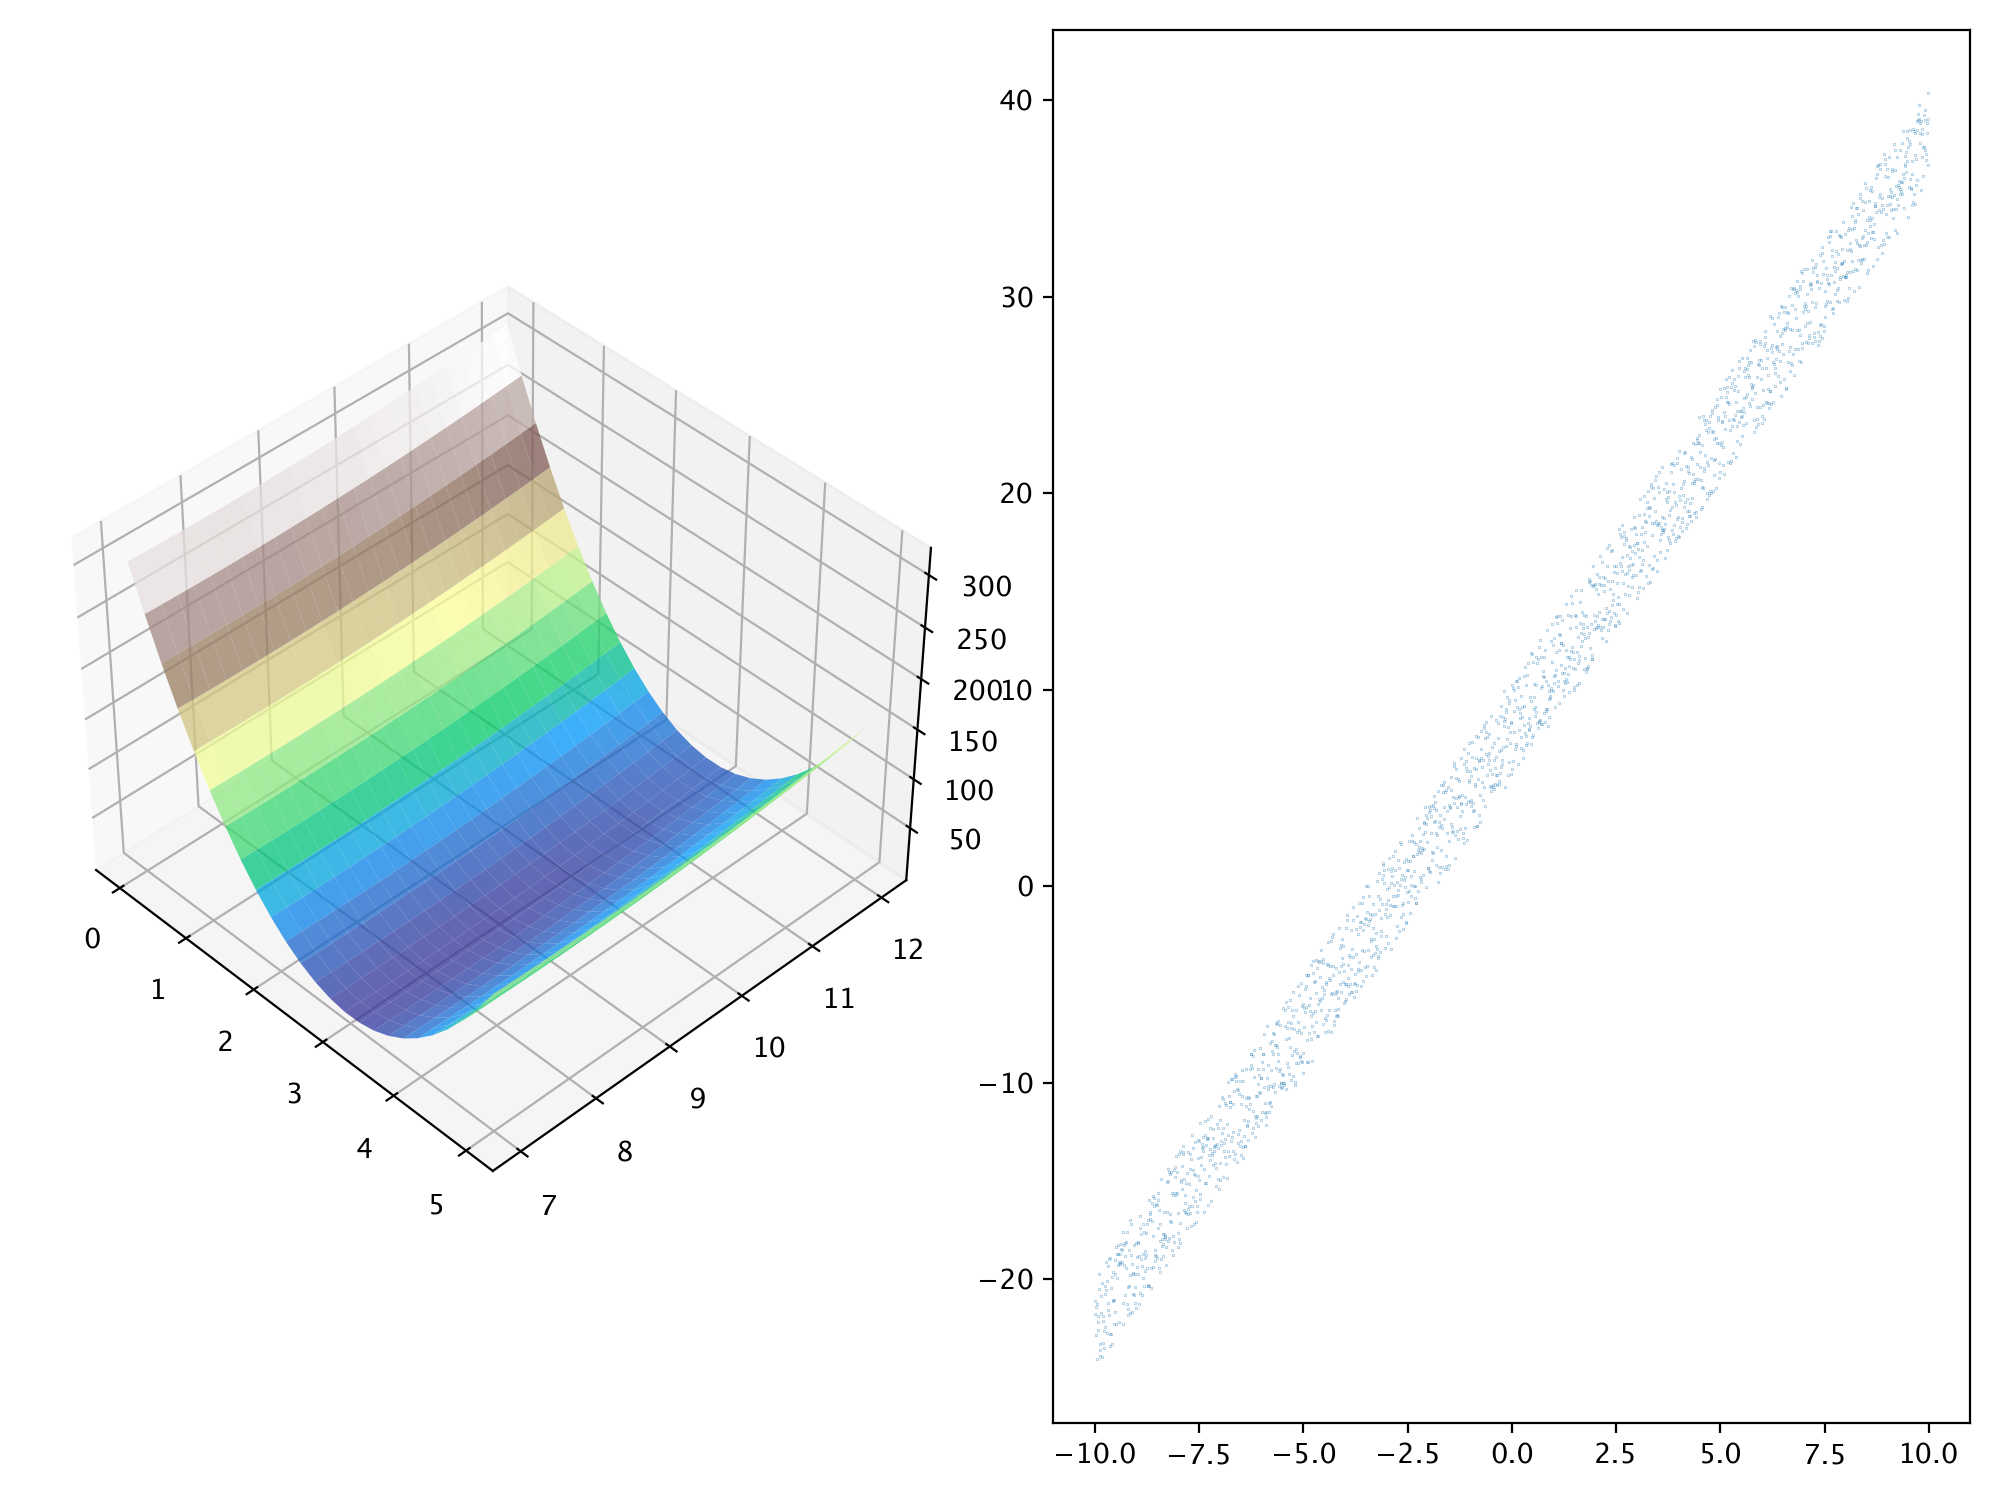

In [16]:
def plot_fig(M1,M2,z_values):
    fig = plt.figure(figsize=(10,7.5)) # create figure
    ax0 = fig.add_subplot(121, projection='3d' )
    ax1 = fig.add_subplot(122, )
    fontsize_=20 # set axis label fontsize
    labelsize_=12 # set tick label size

    # Customize subplots: 
    ax0.view_init(elev=30, azim=-20)



    ax0.plot_surface(M1, M2, z_values, cmap='terrain', 
                                 antialiased=True,cstride=1,rstride=1, alpha=0.75)
    ax1.scatter(base_x_values,y_values,s=0.01)
    plt.tight_layout()
    plt.show()
    
plot_fig(M1,M2,z_values)

In [17]:
#Determine predictions at the current theta
#Calculate the error (difference between actual/predicted)
#Take derivative of loss function
def gradient_descent_step(theta_1,theta_2,x_data,y_data,x_values):
    
    pred_list = np.array([(x_data[i] * theta_1 + theta_2) for i in range(len(x_data))])
    error = y_data - pred_list

    return (-1/len(x_data)) * error.dot(x_values)

#true values = theta_1 = 3 , theta_2 = 40
print(gradient_descent_step(2,20,base_x_values,y_values,x_values))
print(gradient_descent_step(4,5,base_x_values,y_values,x_values))
print(gradient_descent_step(2,2,base_x_values,y_values,x_values))
print(gradient_descent_step(3,40,base_x_values,y_values,x_values))

[-33.55339437  11.98938537]
[33.18830563 -3.02061463]
[-33.46339437  -6.01061463]
[-0.32004437 31.98438537]


In [18]:
learning_rate = 0.001

theta = np.array([random()*25,random()*25])


In [19]:
#Gradient Descent Loop

count = 10000
theta = np.array([0,12])

thetas = [theta]
t1 = datetime.now()
for a in range(count):
    theta = theta - (gradient_descent_step(theta[0],theta[1],base_x_values,y_values,x_values) * learning_rate)
    thetas.append(theta)
    
t2 = datetime.now()
print(t2-t1)


0:00:13.835213


<IPython.core.display.Javascript object>


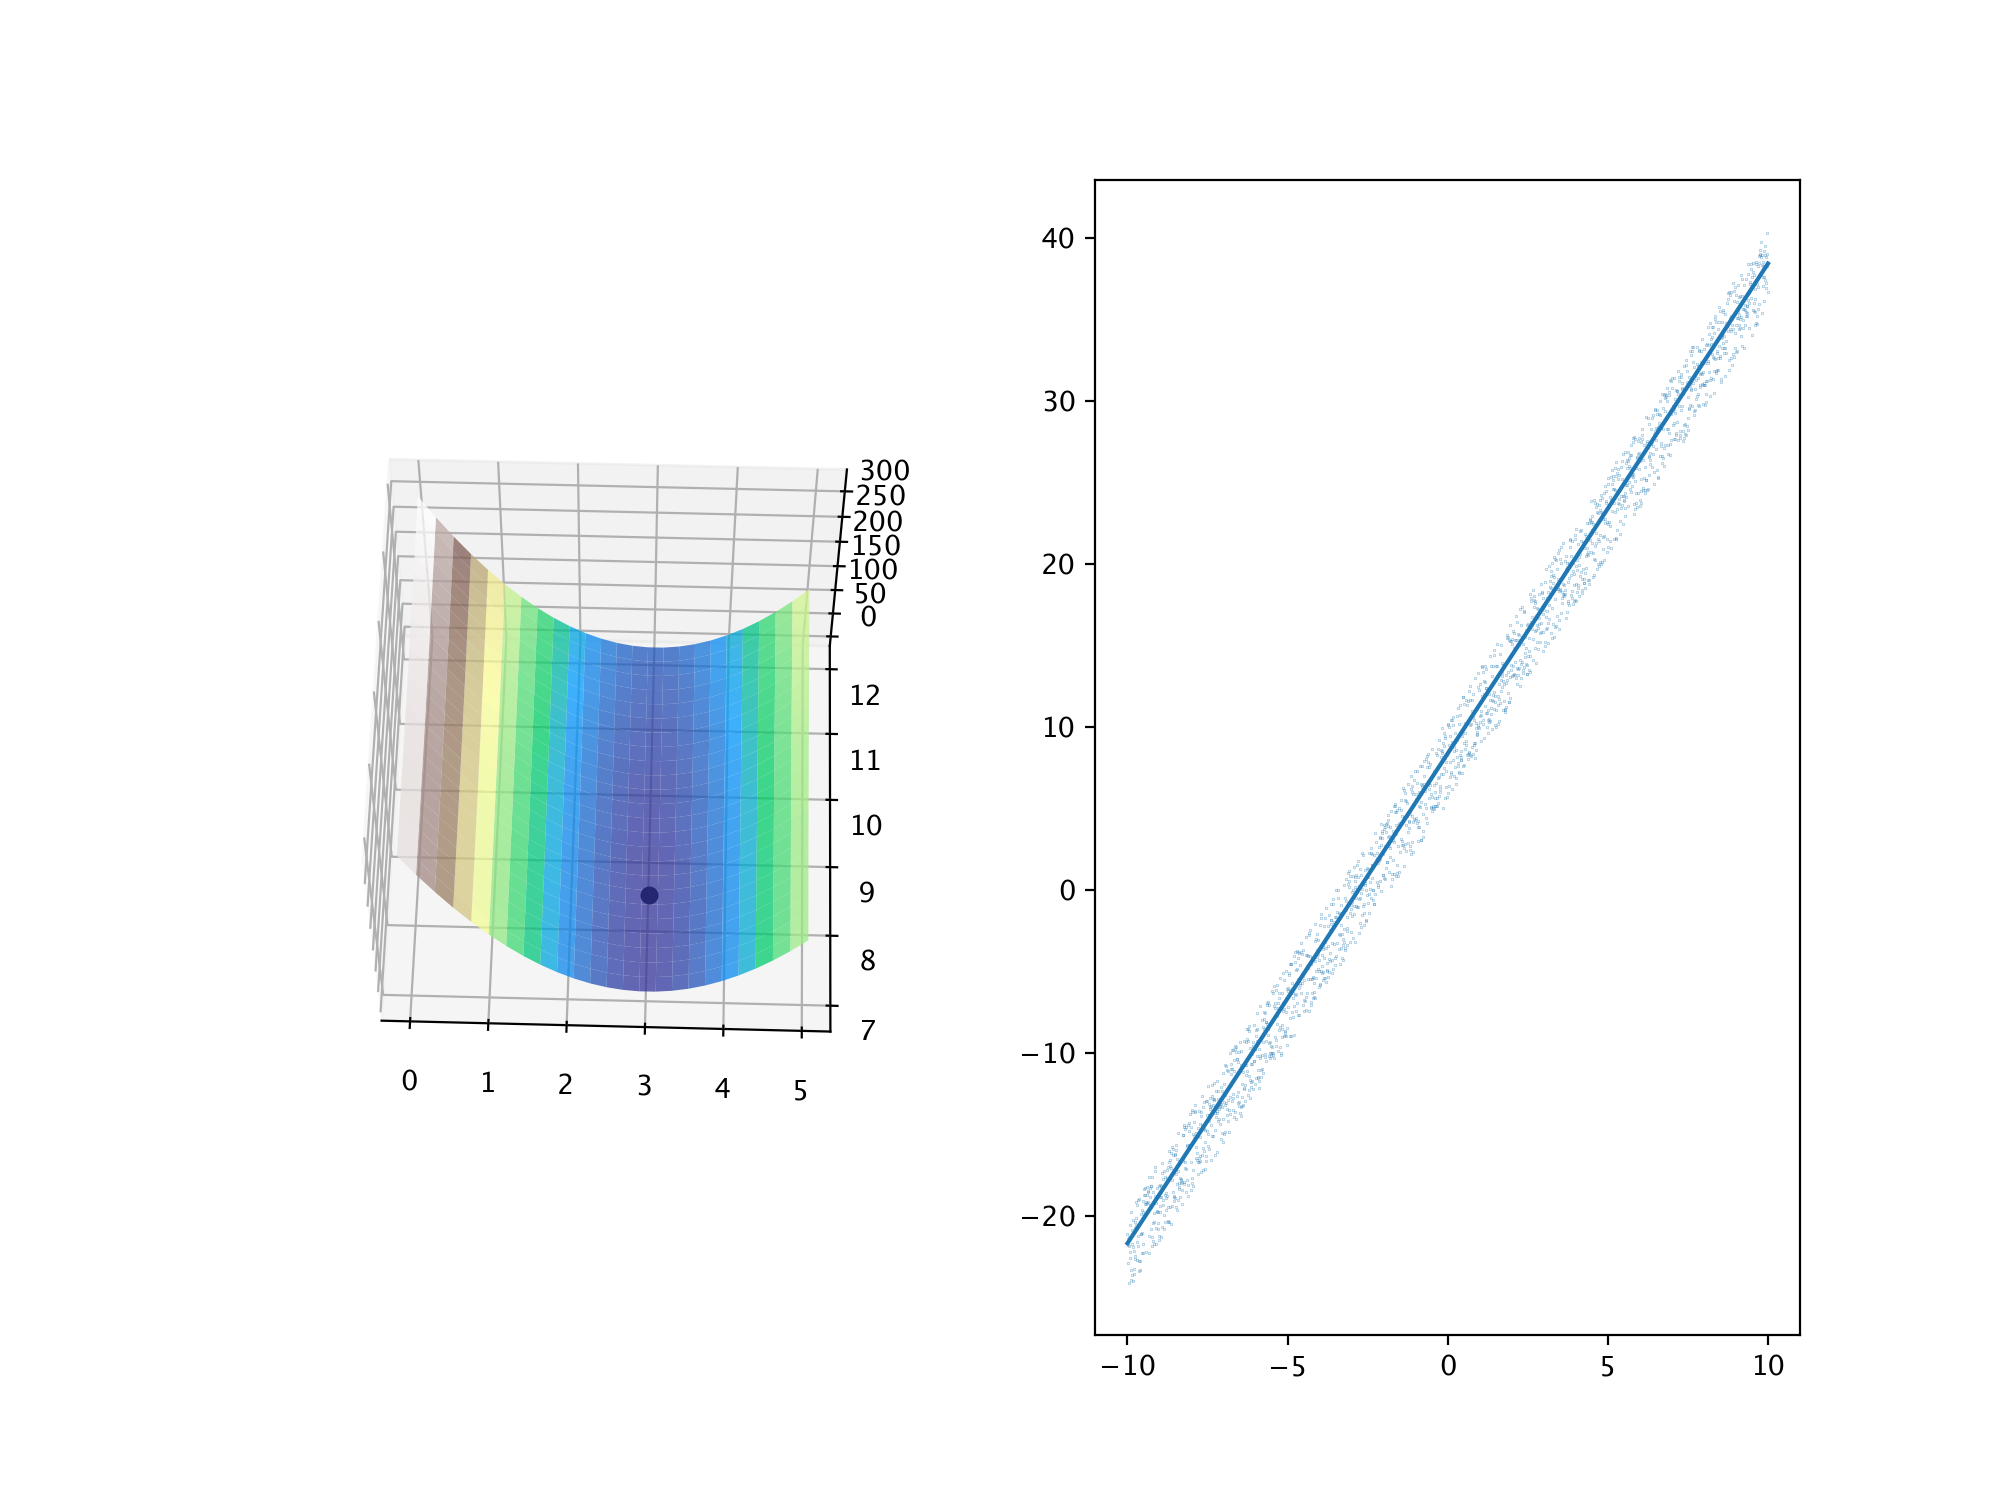

interactive(children=(IntSlider(value=0, description='t', max=2500), Output()), _dom_classes=('widget-interact…

In [20]:

fig = plt.figure(figsize=(10,7.5)) # create figure
ax0 = fig.add_subplot(121, projection='3d' )
ax1 = fig.add_subplot(122, )
fontsize_=20 # set axis label fontsize
labelsize_=12 # set tick label size

# Customize subplots: 
ax0.view_init(elev=30, azim=-20)


ax0.plot_surface(M1, M2, z_values, cmap='terrain', 
                                 antialiased=True,cstride=1,rstride=1, alpha=0.75)
plt.show()
x = np.linspace(-10,10,1000)
def update(t):
    th = thetas[t]
    y = np.array([(th[0] * x1 + th[1]) for x1 in x])
    print(th)
    print(np.average(y))
    ax0.clear()
    ax1.clear()
    ax0.plot_surface(M1, M2, z_values, cmap='terrain', 
                                 antialiased=True,cstride=1,rstride=1, alpha=0.75)
    ax0.scatter(th[0],th[1],cost(base_x_values,y_values,th[0],th[1]),color='black',linewidth=2)
    ax1.scatter(base_x_values,y_values,s=0.01)
    ax1.plot(x,y,linestyle='solid')
    plt.show()


interact(update, t = widgets.IntSlider(value=0,
                                               min=0,
                                               max=2500,
                                               step=1));



In [21]:
batch_size = 256

def naive_sample(xlist,ylist,xv,to_get):
    x,y,xvv = [],[],[]
    for a in range(to_get):
        r = randint(0,len(xlist)-1)
        x.append(xlist[r])
        y.append(ylist[r])
        xvv.append(xv[r])
    return x,y,xvv




In [22]:
#Stochastic Gradient Descent Loop

count = 10000
theta = np.array([0,12])
learning_rate = 0.001

thetas = [theta]
t1 = datetime.now()
for a in range(count):
    x,y, xvv = naive_sample(base_x_values,y_values,x_values,batch_size)
    theta = theta - (gradient_descent_step(theta[0],theta[1],x,y,xvv) * learning_rate)
    thetas.append(theta)


t2 = datetime.now()
print(t2-t1)

0:00:04.819939


<IPython.core.display.Javascript object>


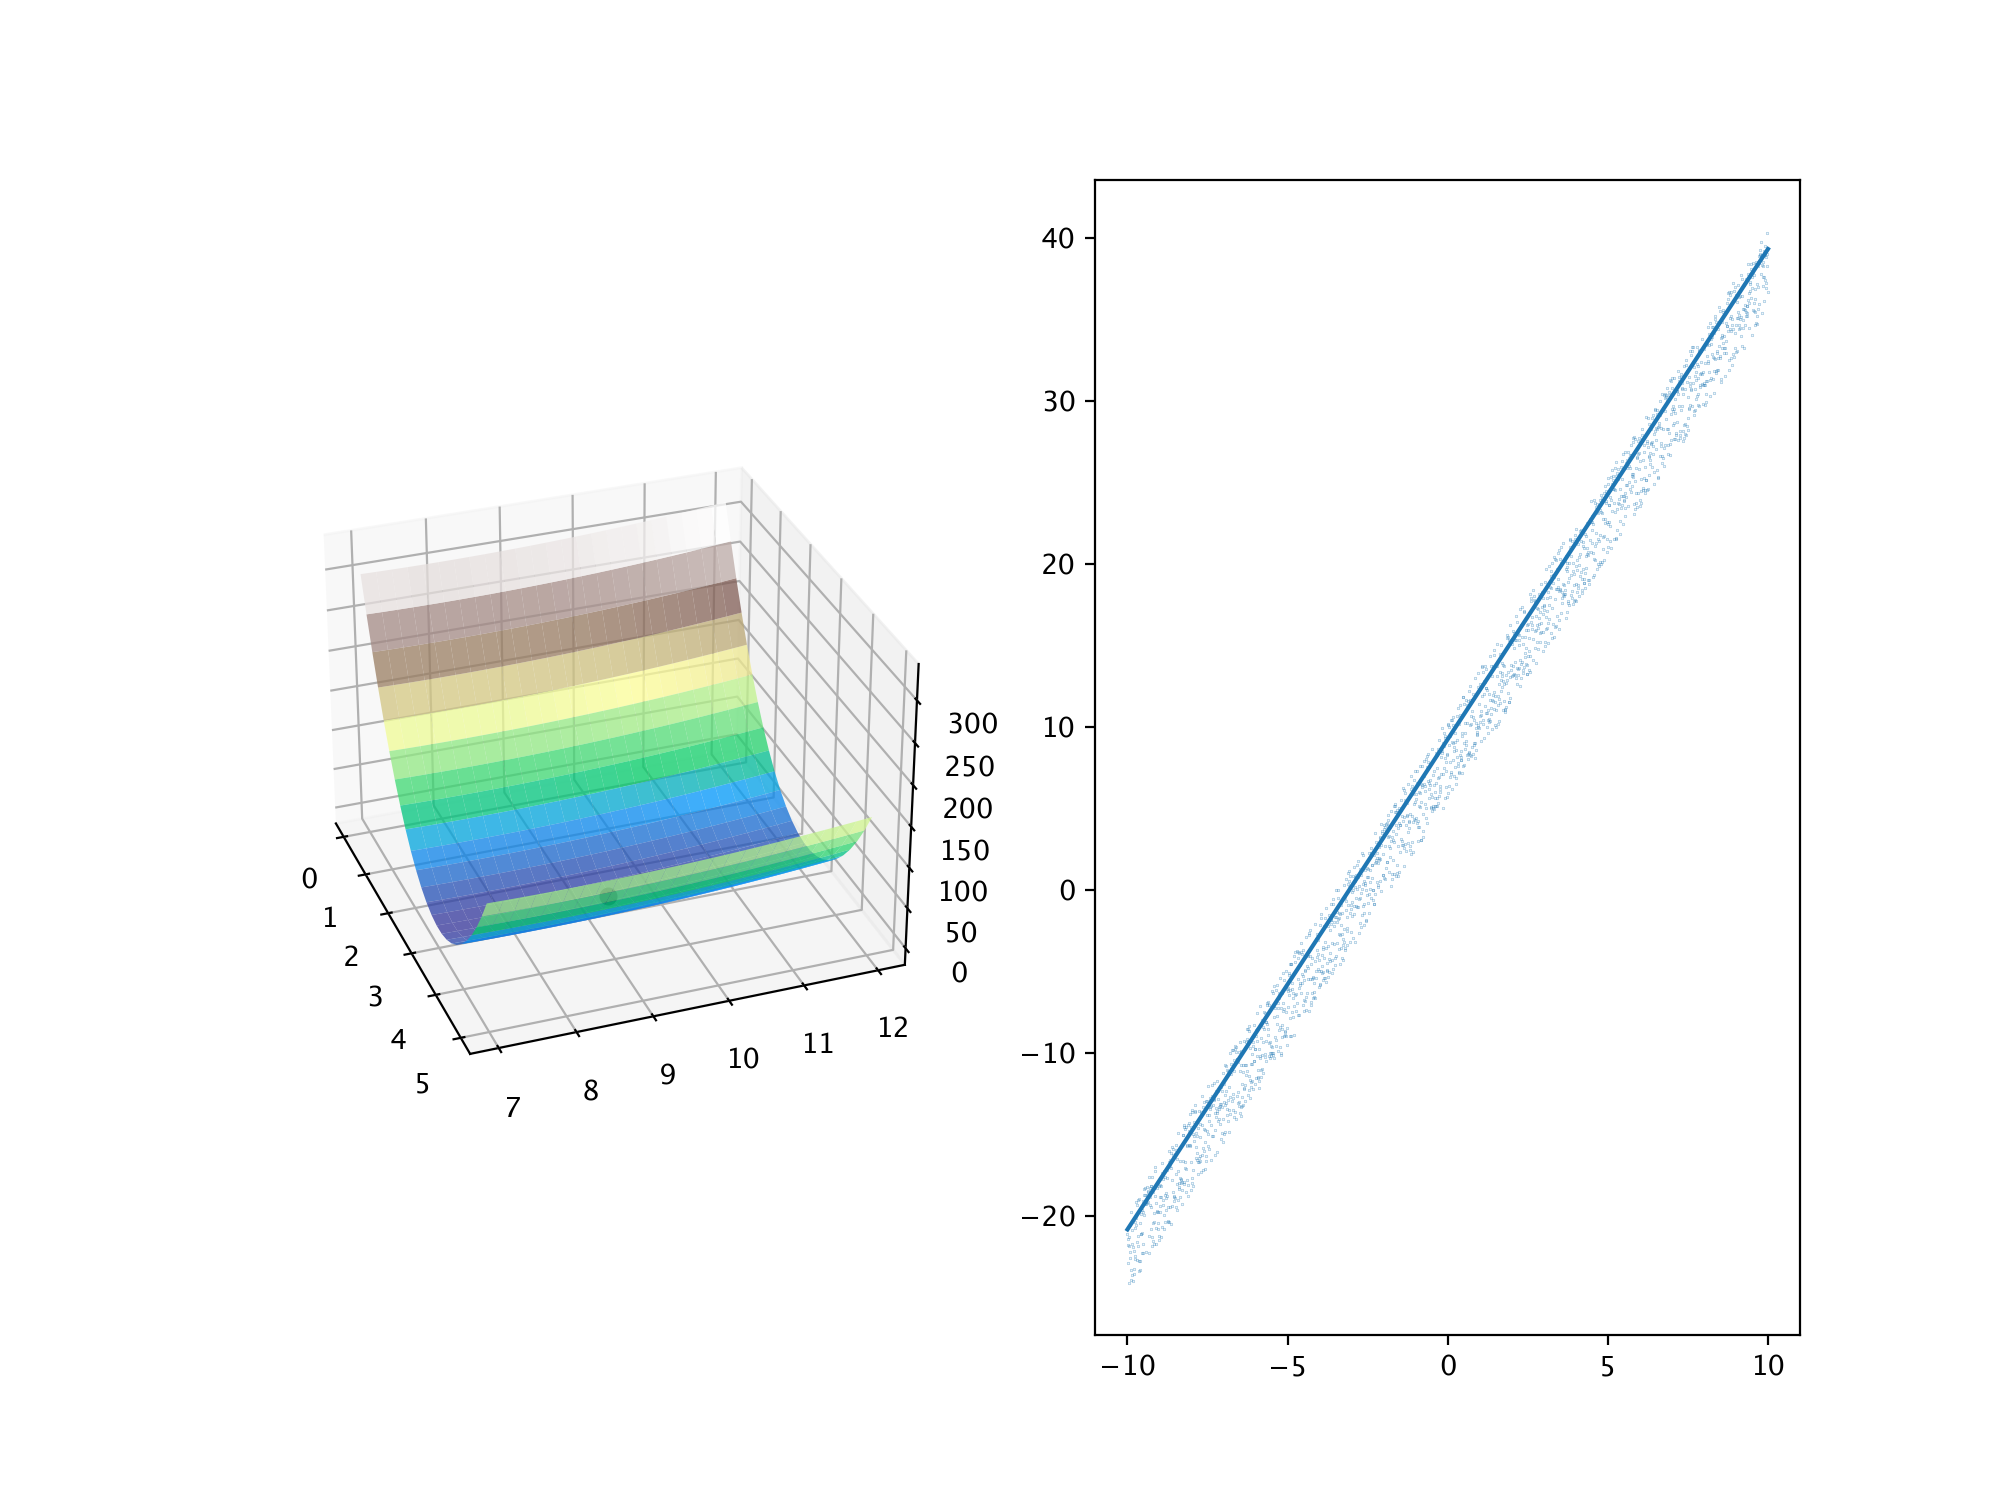

interactive(children=(IntSlider(value=0, description='t', max=2500), Output()), _dom_classes=('widget-interact…

In [23]:
fig = plt.figure(figsize=(10,7.5)) # create figure
ax0 = fig.add_subplot(121, projection='3d' )
ax1 = fig.add_subplot(122, )
fontsize_=20 # set axis label fontsize
labelsize_=12 # set tick label size

# Customize subplots: 
ax0.view_init(elev=30, azim=-20)


ax0.plot_surface(M1, M2, z_values, cmap='terrain', 
                                 antialiased=True,cstride=1,rstride=1, alpha=0.75)
plt.show()
x = np.linspace(-10,10,1000)
def update(t):
    th = thetas[t]
    print(th)
    ax0.clear()
    
    ax1.clear()
    y = np.array([(th[0] * x1 + th[1]) for x1 in x])
    print(np.mean(y))
    ax0.plot_surface(M1, M2, z_values, cmap='terrain', 
                                 antialiased=True,cstride=1,rstride=1, alpha=0.75)
    ax0.scatter(th[0],th[1],cost(base_x_values,y_values,th[0],th[1]),color='black',linewidth=2)
    ax1.scatter(base_x_values,y_values,s=0.01)
    ax1.plot(x,y,linestyle='solid')
    plt.show()


interact(update, t = widgets.IntSlider(value=0,
                                               min=0,
                                               max=2500,
                                               step=1));

In [12]:
x_b = list(range(0,6))
y_b = list(range(7,13,2))
start_points = []
for x in x_b:
    for y in y_b:
        start_points.append([x,y])

In [13]:
#Stochastic Gradient Descent Loop
theta_array = []
t1 = datetime.now()
learning_rate = 0.001
for b in range(len(start_points)):
    count = 2500
    theta = np.array(start_points[b])

    thetas = [theta]

    for a in range(count):
        x,y, xvv = naive_sample(base_x_values,y_values,x_values,batch_size)
        theta = theta - (gradient_descent_step(theta[0],theta[1],x,y,xvv) * learning_rate)
        thetas.append(theta)

    theta_array.append(thetas)
t2 = datetime.now()
print(t2-t1)
print(len(start_points))

0:00:19.504343
18


<IPython.core.display.Javascript object>


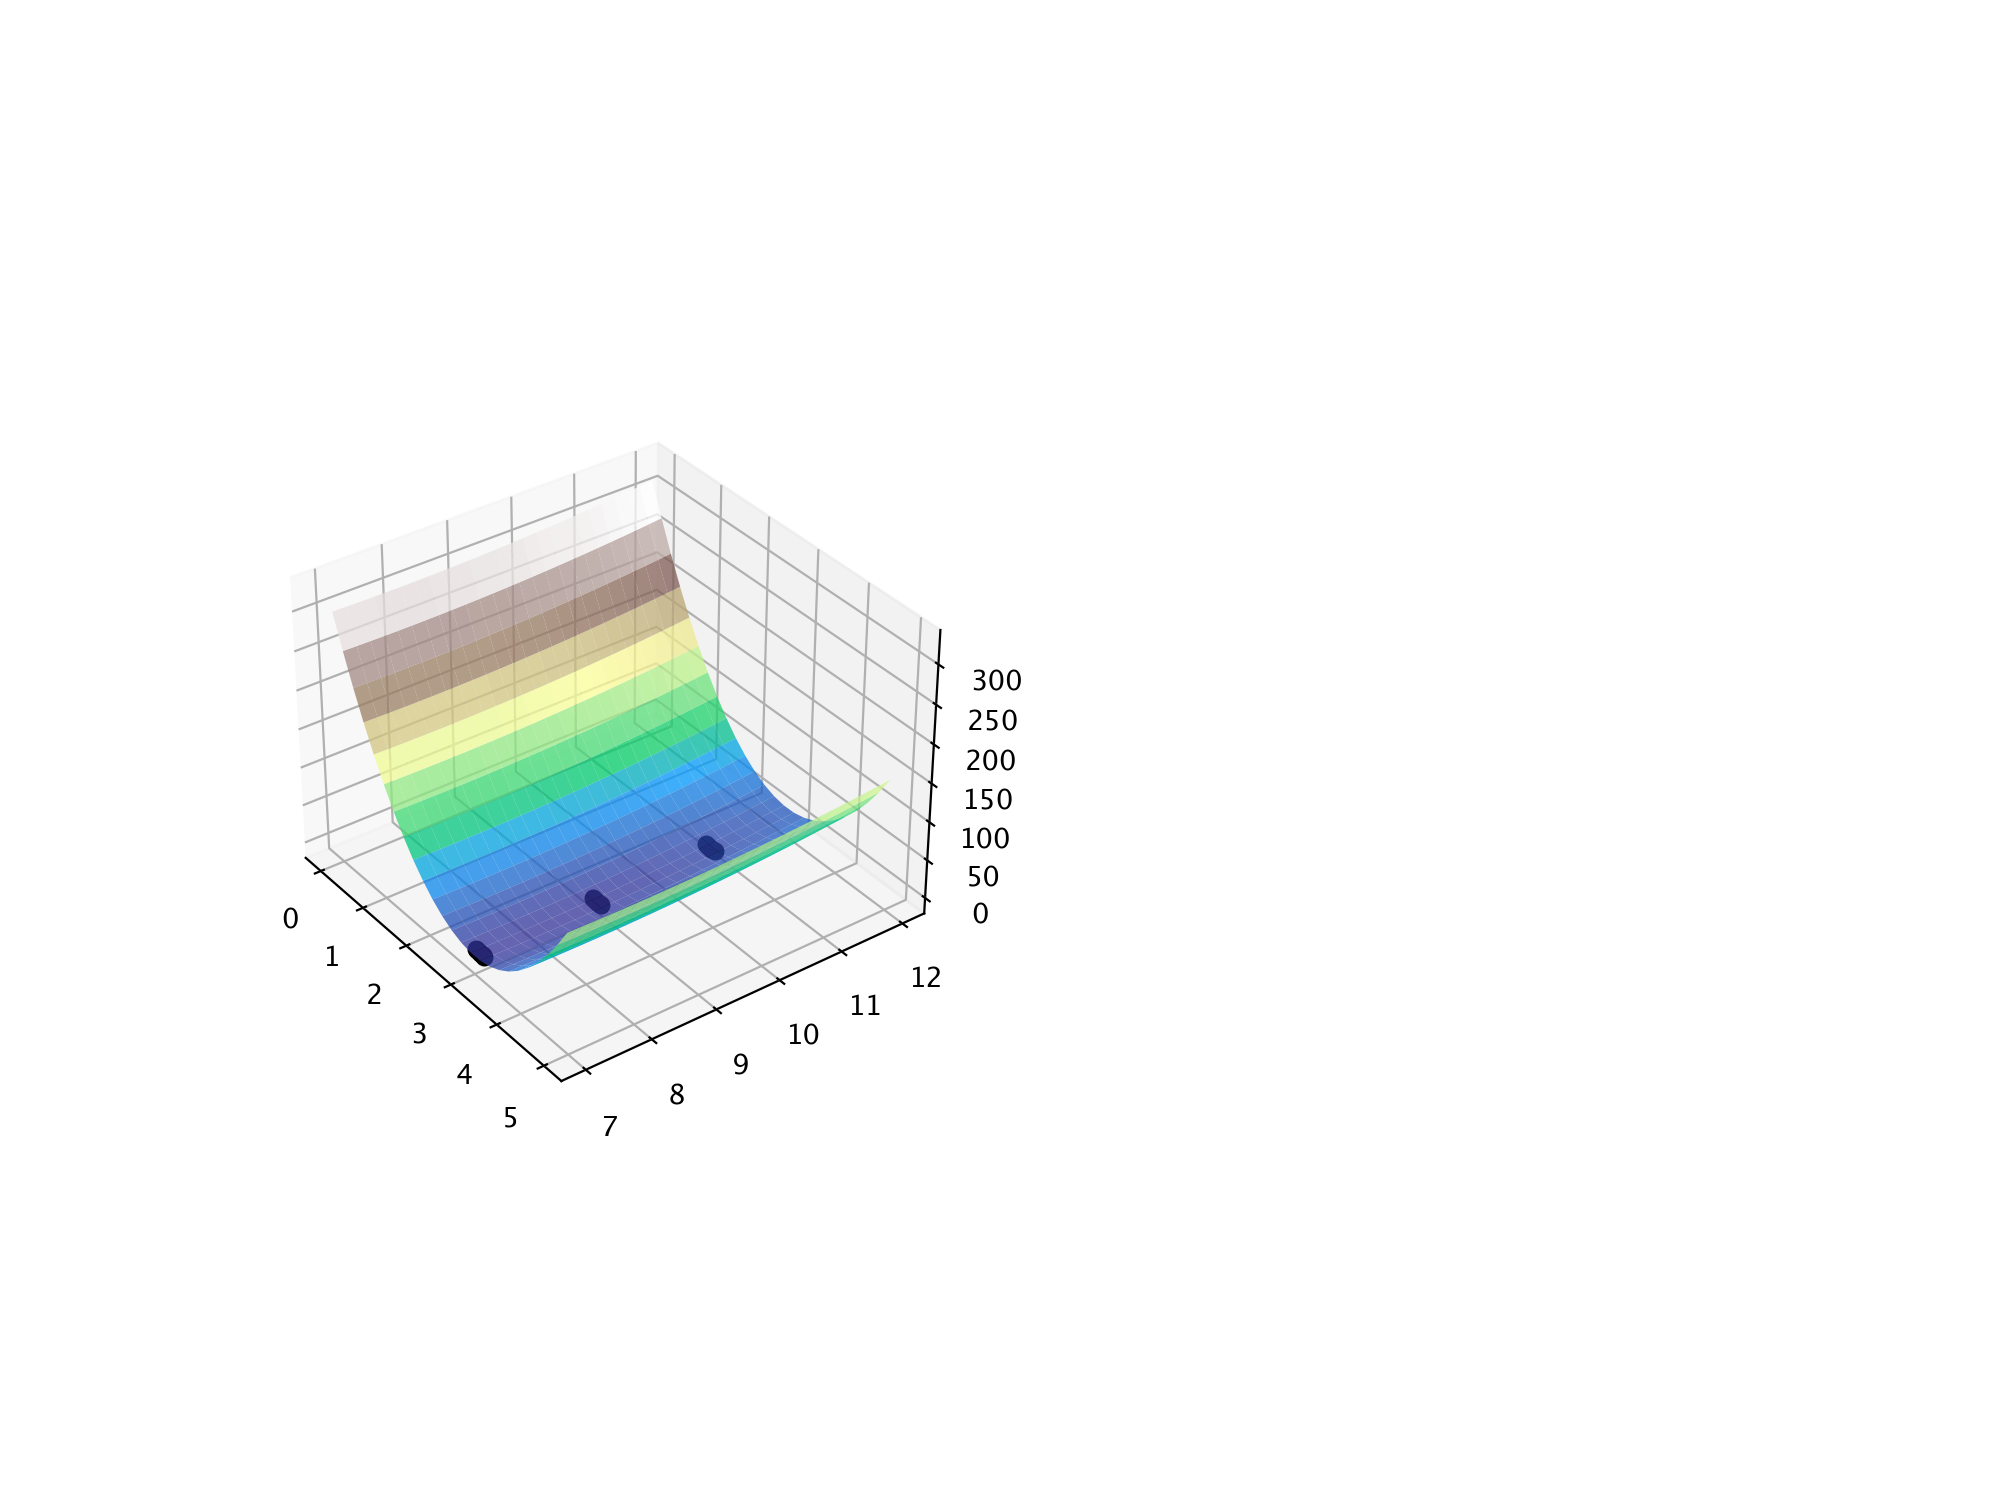

interactive(children=(IntSlider(value=1, description='t', max=2500, min=1), Output()), _dom_classes=('widget-i…

In [24]:
fig = plt.figure(figsize=(10,7.5)) # create figure
ax0 = fig.add_subplot(121, projection='3d' )

fontsize_=20 # set axis label fontsize
labelsize_=12 # set tick label size

# Customize subplots: 
ax0.view_init(elev=30, azim=-20)


ax0.plot_surface(M1, M2, z_values, cmap='terrain', 
                                 antialiased=True,cstride=1,rstride=1, alpha=0.75)
plt.show()

def update(t):
    ax0.clear()
    ax0.plot_surface(M1, M2, z_values, cmap='terrain', 
                                 antialiased=True,cstride=1,rstride=1, alpha=0.75)
    for ts in theta_array:
        th = ts[t]
        ax0.scatter(th[0],th[1],cost(base_x_values,y_values,th[0],th[1]),color='black',linewidth=2)
    plt.show()


interact(update, t = widgets.IntSlider(value=1,
                                               min=1,
                                               max=2500,
                                               step=1));